In [10]:
pip install geopandas

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 327.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------- ----------- 0.8/1.1 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 17.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   -- ------------------------------------- 1.3/22.9 MB 27.2 MB/s eta 0:00:01
   ---- ----------------------------------- 2.4/22.9 MB 30.5 MB/s eta 0:00:01
   ------ --------------------------------- 3.7/22.9 MB 29.7 MB/s eta 0:00:01
   -------- ------------------------------- 5.1/22.9 MB 29.4 MB/s eta 0:00:01
   ---------- --

In [54]:
pip install plotly

  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 330.3 kB/s eta 0:00:48
   ---------------------------------------- 0.2/15.7 MB 1.2 MB/s eta 0:00:14
   -- ------------------------------------- 0.9/15.7 MB 4.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/15.7 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/15.7 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.8/15.7 MB 8.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.7 MB 9.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.7/15.7 MB 9.5 MB/s eta 0:00:02
   ----------- ----------------------

In [56]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.6 MB 18.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/10.6 MB 22.8 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.6 MB 24.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 24.3 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/10.6 MB 26.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.6 MB 26.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.8/10.6 MB 26.1 MB/s eta 0:00:01
   ----

In [68]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString
import warnings

In [58]:
airport = pd.read_csv('flight_data/airports.csv')
routes = pd.read_csv('flight_data/routes.csv')
print(airports)
print(routes)

      index  Airport ID                                         Name  \
0         0           1                               Goroka Airport   
1         1           2                               Madang Airport   
2         2           3                 Mount Hagen Kagamuga Airport   
3         3           4                               Nadzab Airport   
4         4           5  Port Moresby Jacksons International Airport   
...     ...         ...                                          ...   
7693   7693       14106                          Rogachyovo Air Base   
7694   7694       14107                        Ulan-Ude East Airport   
7695   7695       14108                         Krechevitsy Air Base   
7696   7696       14109                  Desierto de Atacama Airport   
7697   7697       14110                           Melitopol Air Base   

              City           Country IATA  ICAO   Latitude   Longitude  \
0           Goroka  Papua New Guinea  GKA  AYGA  -6.081690  1

In [59]:
airport.columns

Index(['index', 'Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO',
       'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
       'Tz database time zone', 'Type', 'Source'],
      dtype='object')

In [60]:
routes.columns

Index(['index', 'Airline', 'Airline ID', 'Source airport', 'Source airport ID',
       'Destination airport', 'Destination airport ID', 'Codeshare', 'Stops',
       'Equipment'],
      dtype='object')

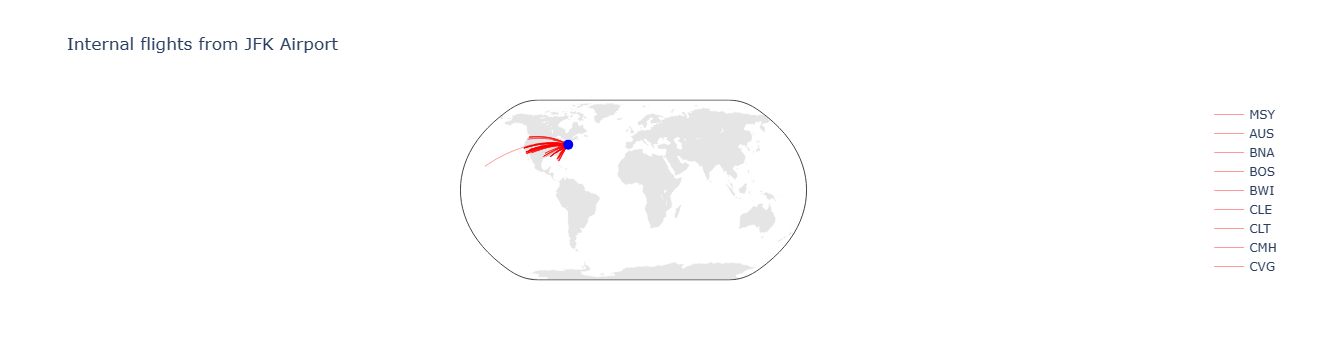

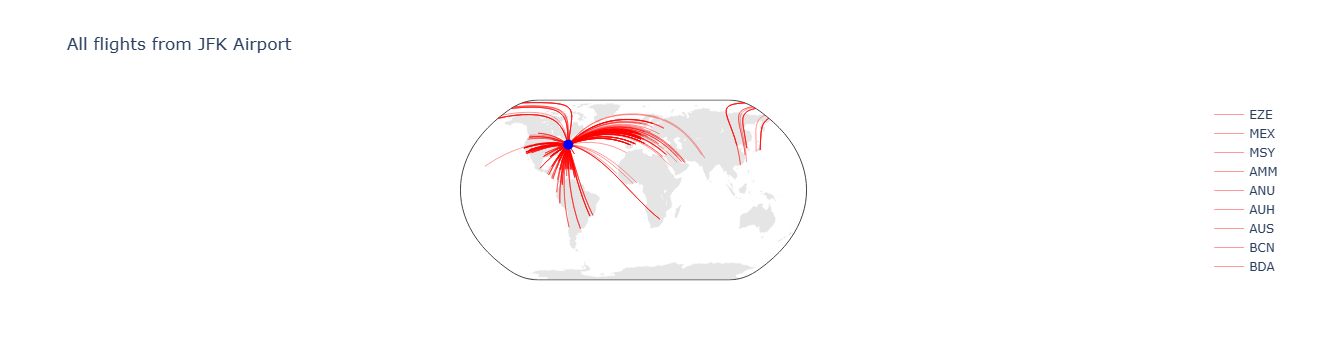

In [80]:
def plot_flights_from_jfk(internal=False):

    # Filter routes based on JFK as the source airport
    jfk_routes = routes[routes['Source airport'] == 'JFK']

    # Optionally, filter internal flights
    if internal:
        jfk_country = airports.loc[airports['IATA'] == 'JFK', 'Country'].iloc[0]
        jfk_routes = jfk_routes[jfk_routes['Destination airport'].isin(
            airports[airports['Country'] == jfk_country]['IATA']
        )]

        # Set title for internal flights
        title = f'Internal flights from JFK Airport'
    else:
        # Set title for all flights
        title = f'All flights from JFK Airport'

    # Create Plotly trace for flight paths
    flight_paths = []
    for i, row in jfk_routes.iterrows():
        origin = airports.loc[airports['IATA'] == row['Source airport']]
        destination = airports.loc[airports['IATA'] == row['Destination airport']]

        flight_paths.append(
            go.Scattergeo(
                locationmode='ISO-3',
                lon=[float(origin['Longitude']), float(destination['Longitude'])],
                lat=[float(origin['Latitude']), float(destination['Latitude'])],
                mode='lines',
                line=dict(width=0.5, color='red'),
                opacity=0.8,
                name=row['Destination airport']
            )
        )

    # Create Plotly trace for JFK airport marker
    jfk_marker = go.Scattergeo(
        locationmode='ISO-3',
        lon=[float(airports.loc[airports['IATA'] == 'JFK', 'Longitude'])],
        lat=[float(airports.loc[airports['IATA'] == 'JFK', 'Latitude'])],
        mode='markers',
        marker=dict(size=10, color='blue'),
        text='JFK Airport',
        name='JFK Airport'
    )

    # Set layout
    layout = go.Layout(
        title=title,
        showlegend=True,
        geo=dict(
            scope='world',
            showland=True,
            landcolor='rgb(229, 229, 229)',
            countrycolor='rgb(255, 255, 255)',
            coastlinecolor='rgb(255, 255, 255)',
            projection_type='natural earth',
        )
    )

    # Create the figure and plot
    fig = go.Figure(data=[*flight_paths, jfk_marker], layout=layout)
    pyo.iplot(fig, filename='flight_paths')

# Example usage:
plot_flights_from_jfk(internal=True)
plot_flights_from_jfk(internal=False)